In [4]:
import torch
import torchvision
import torchvision.transforms as transforms

In [5]:
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])

In [6]:
trainset = torchvision.datasets.CIFAR10('./data', train = True, download = True, transform = transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size = 4, shuffle = True, num_workers = 2)

Extracting ./data/cifar-10-python.tar.gz to ./data


In [7]:
testset = torchvision.datasets.CIFAR10('./data', train = False, download = True, transform = transform)
testloader = torch.utils.data.DataLoader(trainset, batch_size = 4, shuffle = True, num_workers = 2)

Files already downloaded and verified


In [8]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [9]:
import matplotlib.pyplot as plt
import numpy as np

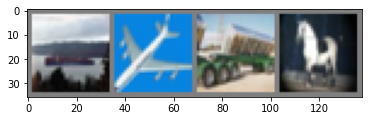

 ship plane truck horse


In [10]:
def imshow(img):
    img = img/2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))
    plt.show()
    
dataiter = iter(trainloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))

print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [11]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16*5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
net = Net()        

In [18]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [19]:
print(trainloader)

In [31]:
for epoch in range(20):
    
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        if i % 2000 == 1999:
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss/ 2000))
            running_loss = 0.0
            
print('Finished Training')

[1,  2000] loss: 1.228
[1,  4000] loss: 1.221
[1,  6000] loss: 1.208
[1,  8000] loss: 1.237
[1, 10000] loss: 1.250
[1, 12000] loss: 1.231
[2,  2000] loss: 1.241
[2,  4000] loss: 1.212
[2,  6000] loss: 1.213
[2,  8000] loss: 1.256
[2, 10000] loss: 1.231
[2, 12000] loss: 1.224
[3,  2000] loss: 1.217
[3,  4000] loss: 1.241
[3,  6000] loss: 1.226
[3,  8000] loss: 1.231
[3, 10000] loss: 1.216
[3, 12000] loss: 1.233
[4,  2000] loss: 1.228
[4,  4000] loss: 1.228
[4,  6000] loss: 1.200
[4,  8000] loss: 1.240
[4, 10000] loss: 1.230
[4, 12000] loss: 1.238
[5,  2000] loss: 1.224
[5,  4000] loss: 1.218
[5,  6000] loss: 1.237
[5,  8000] loss: 1.218
[5, 10000] loss: 1.238
[5, 12000] loss: 1.245
[6,  2000] loss: 1.231
[6,  4000] loss: 1.216
[6,  6000] loss: 1.224
[6,  8000] loss: 1.241
[6, 10000] loss: 1.234
[6, 12000] loss: 1.230
[7,  2000] loss: 1.219
[7,  4000] loss: 1.223
[7,  6000] loss: 1.235
[7,  8000] loss: 1.234
[7, 10000] loss: 1.243
[7, 12000] loss: 1.222
[8,  2000] loss: 1.237
[8,  4000] 

In [32]:
PATH = './cnn.path'
torch.save(net.state_dict(), PATH)

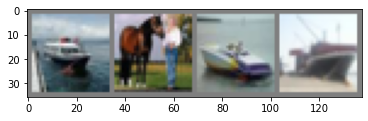

GroundTruth:   ship horse  ship  ship


In [33]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [34]:
import os
net = Net()

net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [35]:
correct = 0
total = 0

with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
print('Accuracy of the network on the 10000 test images: %d %%' % (100*correct/total))

Accuracy of the network on the 10000 test images: 56 %


In [36]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 68 %
Accuracy of   car : 79 %
Accuracy of  bird : 47 %
Accuracy of   cat : 36 %
Accuracy of  deer : 46 %
Accuracy of   dog : 35 %
Accuracy of  frog : 61 %
Accuracy of horse : 68 %
Accuracy of  ship : 71 %
Accuracy of truck : 47 %
